<h1>Data processing </h1>

In [22]:
# Processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split

# ML Libraries
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random

columns = ['id','nb_words_title','nb_words_content','pp_uniq_words','pp_stop_words','pp_uniq_non-stop_words',
            'nb_links','nb_outside_links','nb_images','nb_videos','ave_word_length','nb_keywords','category',
            'nb_mina_mink','nb_mina_maxk','nb_mina_avek','nb_maxa_mink','nb_maxa_maxk','nb_maxa_avek','nb_avea_mink',
            'nb_avea_maxk','nb_avea_avek','nb_min_linked','nb_max_linked','nb_ave_linked','weekday','dist_topic_0',
            'dist_topic_1','dist_topic_2','dist_topic_3','dist_topic_4','subj','polar','pp_pos_words','pp_neg_words',
            'pp_pos_words_in_nonneutral','ave_polar_pos','min_polar_pos','max_polar_pos','ave_polar_neg','min_polar_neg',
            'max_polar_neg','subj_title','polar_title'
          ]

train_data = pd.read_csv('train.csv', delimiter =' ', names = columns)
train_data_target = pd.read_csv('train-targets.csv')
train_data_target = train_data_target.set_index('Id')


#test_set = pd.read_csv('test-val.csv', delimiter = ' ')



util_train_data = pre.scale(train_data.drop('id', axis=1))
util_train_data = pd.DataFrame(util_train_data, columns = columns[1:])

train_data, test_set, target_train, target_test = train_test_split(
                                                        util_train_data,
                                                        train_data_target,
                                                        random_state = 0)

#train_data,test_set,target_train,target_test = train_test_split(
#                                                        train_data,
#                                                        train_data_target,
#                                                        random_state = 0)

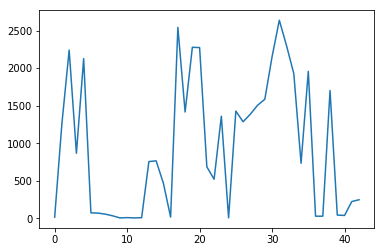

nb_videos 6
ave_word_length 10
nb_keywords 6
category 9
nb_ave_linked 7


In [2]:
#Audit des données
info = [] 
for column in train_data.keys():
    info.append(len(train_data[column].unique()))
    
info
plt.plot(info)
plt.show()

for index,k in enumerate(info):
    if k <= 10:
        print(columns[index],k)

0.871630244938


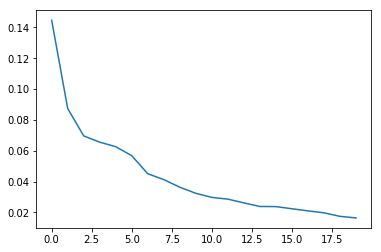

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
df = pca.fit_transform(train_data) #df est un array
print(sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [23]:
# On va tenter de centrer la prediction

new_target_train =np.log(np.log(target_train['Prediction']))
new_target_test = np.log(np.log(target_test['Prediction']))

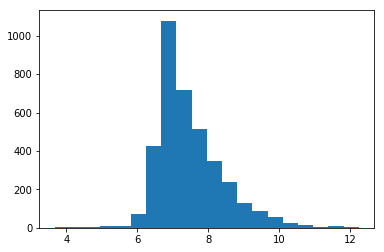

In [5]:
count_target = {}
for prediction in target_train['Prediction']:
    if prediction in count_target:
        count_target[prediction] +=1
    else:
        count_target[prediction] = 1

indices = count_target.keys()
counts = [count_target[keys] for keys in  indices]

plt.hist(np.log(target_train['Prediction']), bins = 20)
plt.show()


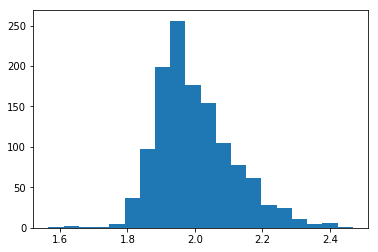

In [6]:
plt.hist(np.log(np.log(target_test['Prediction'])), bins = 20)
plt.show()

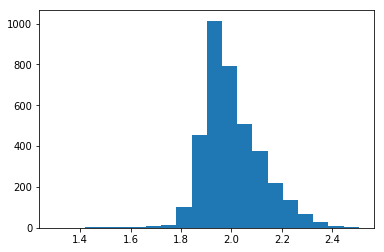

In [7]:
plt.hist(np.log(np.log(target_train['Prediction'])), bins = 20)
plt.show()

<h1>Partie modelisation </h1>

In [26]:
from sklearn.linear_model import Lasso
clf = Lasso()
clf.fit(train_data, new_target_train)


prediction = clf.predict(test_set)

random = np.random.random_sample((len(prediction),))
len(random)

1250

In [27]:
rmsle(new_target_test,prediction) # 0.102253

0.038023559592085032

In [28]:
rmsle(new_target_test,random)

0.74287294546960925

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

opti_rate = 0.075151515

clf2 = GradientBoostingRegressor(learning_rate = opti_rate, random_state = 1)
clf2.fit(train_data, new_target_train)
prediction_GB = clf2.predict(test_set)
rmsle(new_target_test,prediction_GB) # 0.03554735


In [ ]:
rate[error.index(min(error))]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf3 = RandomForestRegressor()
clf3.fit(train_data,new_target_train)
prediction_RF = clf3.predict(test_set)
rmsle(new_target_test,prediction_RF) #0.101687

<h1>Test réseau de neuronnes </h1>

In [6]:
#import tensorflow
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Activation, Dropout

In [67]:
model = Sequential()
model.add(Dense(20, input_shape= (43,)))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(20, name = 'jesuisla'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop')



model.fit(np.array(train_data),new_target_train, epochs = 20, batch_size=1000)
prediction_NN = model.predict(np.array(test_set))
prediction_NN = 


rmsle(np.array(new_target_test),prediction_NN) #0.230

Epoch 1/20
3750/3750 [==============================] - 0s 7us/step - loss: 2.5223
Epoch 2/20
3750/3750 [==============================] - 0s 13us/step - loss: 2.0631
Epoch 3/20
3750/3750 [==============================] - 0s 9us/step - loss: 1.6852
Epoch 4/20
3750/3750 [==============================] - 0s 11us/step - loss: 1.5722
Epoch 5/20
3750/3750 [==============================] - 0s 13us/step - loss: 1.3295
Epoch 6/20
3750/3750 [==============================] - 0s 8us/step - loss: 1.4288
Epoch 7/20
3750/3750 [==============================] - 0s 9us/step - loss: 1.2102
Epoch 8/20
3750/3750 [==============================] - 0s 10us/step - loss: 1.1545
Epoch 9/20
3750/3750 [==============================] - 0s 7us/step - loss: 1.1116
Epoch 10/20
3750/3750 [==============================] - 0s 9us/step - loss: 1.1397
Epoch 11/20
3750/3750 [==============================] - 0s 10us/step - loss: 0.9622
Epoch 12/20
3750/3750 [==============================] - 0s 9us/step - loss: 0.9

0.26308656740103536

In [68]:
model2 = model(input = train_data, output = ['jesuisla'])

TypeError: __call__() takes exactly 2 arguments (1 given)

<h1> 2-Evaluation metric </h1>

In [8]:
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
     
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [74]:
valiadtion_pred = model.predict(validation)
pd.DataFrame(np.round(np.exp(prediction_NN))).astype('int')

,0
0,3
1,3
2,3
3,5
4,15
5,5
6,4
7,2
8,5
9,5
